# Car Fuel Consumption 

By Meysour Omezzine

In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from random import sample
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pickle
! pip install wordcloud
from wordcloud import WordCloud

### Data preparation 

In [2]:
# Data import 

df = pd.read_csv('measurements.csv')

In [3]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df.shape

(388, 12)

In [5]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [6]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

###### Dropping Nan

In [7]:
df.drop(['specials', 'refill liters', 'refill gas'], axis=1, inplace=True)

In [8]:
df['temp_inside'].value_counts()

#checking the value counts of column temp inside

21,5    133
22      102
22,5     59
20       25
21       13
23       13
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

In [9]:
df['temp_inside'].fillna(21.5, inplace=True)

#filling the NaN values with the most occured value

In [10]:
df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype(float)

#convert the 'temp_inside' column to a float type using the astype() method
#replace the comma with a period as the decimal separator

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    object 
 1   consume       388 non-null    object 
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 27.4+ KB


In [12]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,"4,2",30,21.5,13,E10,0,0,0
2,"11,2","5,5",38,21.5,15,E10,0,0,0
3,"12,9","3,9",36,21.5,14,E10,0,0,0
4,"18,5","4,5",46,21.5,15,E10,0,0,0


In [13]:
df['consume'] = df['consume'].str.replace(',', '.').astype(float)





In [14]:
df.fillna(df.mean(), inplace=True)


/var/folders/2t/2pxpfxm91mg6w4grvjd9xpr00000gn/T/ipykernel_78279/1920348818.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


### Visualization

Now that the data is cleaned, xe can now proceed with some exploratory data analysis. 

Let's start by looking at the distribution of the 'consume' column : 

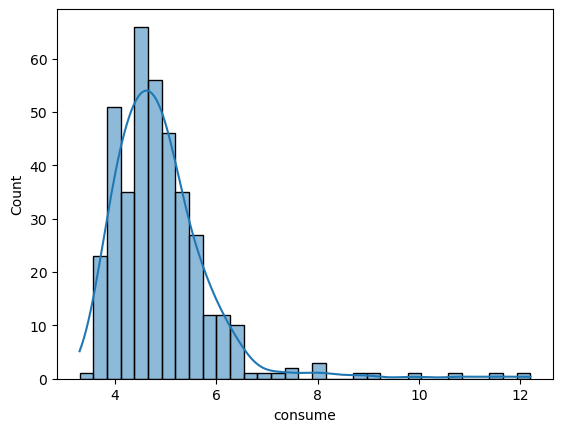

In [15]:
sns.histplot(data=df, x='consume', kde=True)
plt.show()

In [16]:
def fuel_cost(row):
    if row['gas_type'] == 'E10':
        return row['consume'] * 1.38
    elif row['gas_type'] == 'SP98':
        return row['consume'] * 1.46
    else:
        return None

df['fuel_cost'] = df.apply(fuel_cost, axis=1)

In [17]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,fuel_cost
0,28,5.0,26,21.5,12,E10,0,0,0,6.900
1,12,4.2,30,21.5,13,E10,0,0,0,5.796
2,"11,2",5.5,38,21.5,15,E10,0,0,0,7.590
3,"12,9",3.9,36,21.5,14,E10,0,0,0,5.382
4,"18,5",4.5,46,21.5,15,E10,0,0,0,6.210


In [18]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,fuel_cost
0,28,5.0,26,21.5,12,E10,0,0,0,6.900
1,12,4.2,30,21.5,13,E10,0,0,0,5.796
2,"11,2",5.5,38,21.5,15,E10,0,0,0,7.590
3,"12,9",3.9,36,21.5,14,E10,0,0,0,5.382
4,"18,5",4.5,46,21.5,15,E10,0,0,0,6.210
...,...,...,...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,SP98,0,0,0,5.402
384,"16,1",4.3,38,25.0,31,SP98,1,0,0,6.278
385,16,3.8,45,25.0,19,SP98,0,0,0,5.548
386,"15,4",4.6,42,25.0,31,SP98,1,0,0,6.716


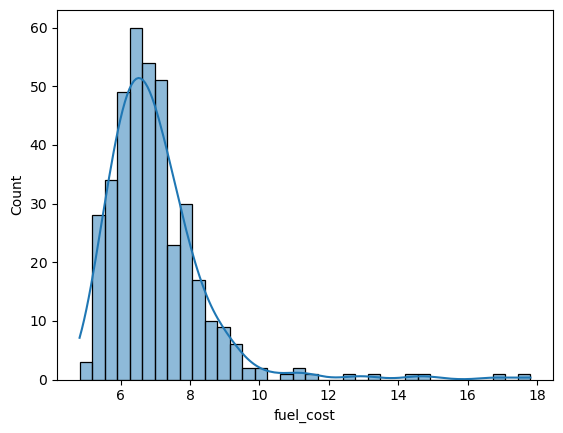

In [19]:
sns.histplot(data=df, x='fuel_cost', kde=True)
plt.show()

A/C and fuel consumption 

In [40]:
df['gas_type'] = pd.Categorical(df['gas_type'])
df['is_AC_on'] = np.where(df['AC'] == 1, 1, 0)


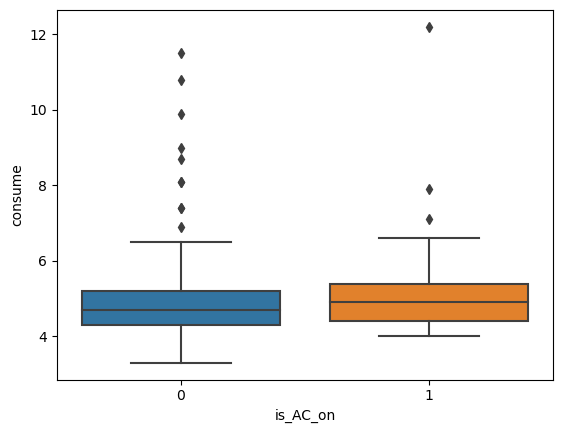

In [41]:
sns.boxplot(data=df, x='is_AC_on', y='consume')
plt.show()


Speed and consumption 

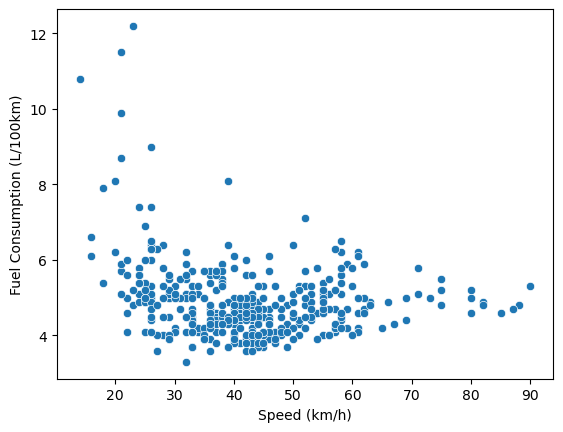

In [48]:
sns.scatterplot(data=df, x='speed', y='consume')
plt.xlabel('Speed (km/h)')
plt.ylabel('Fuel Consumption (L/100km)')
plt.show()

### Predictions : Does the Car consume more with E10 ? 

In [20]:
import scipy.stats as stats

# separate the consume data for E10 and E98
consume_e10 = df[df['gas_type'] == 'E10']['consume']
consume_e98 = df[df['gas_type'] == 'SP98']['consume']

# perform a t-test for independent samples
t_statistic, p_value = stats.ttest_ind(consume_e10, consume_e98, equal_var=False)

# set the significance level (alpha)
alpha = 0.05

# compare p-value with alpha
if p_value < alpha:
    print("Reject null hypothesis: there is a significant difference in consumption between E10 and E98")
else:
    print("Cannot reject null hypothesis: there is no significant difference in consumption between E10 and E98")


Cannot reject null hypothesis: there is no significant difference in consumption between E10 and E98


In [21]:
# Calculate mean consumption for E10 and E98
mean_e10 = df.loc[df['gas_type'] == 'E10', 'consume'].mean()
mean_e98 = df.loc[df['gas_type'] == 'SP98', 'consume'].mean()

# Print mean consumption for each fuel type
print(f"Mean consumption for E10: {mean_e10:.2f}")
print(f"Mean consumption for E98: {mean_e98:.2f}")


Mean consumption for E10: 4.93
Mean consumption for E98: 4.90


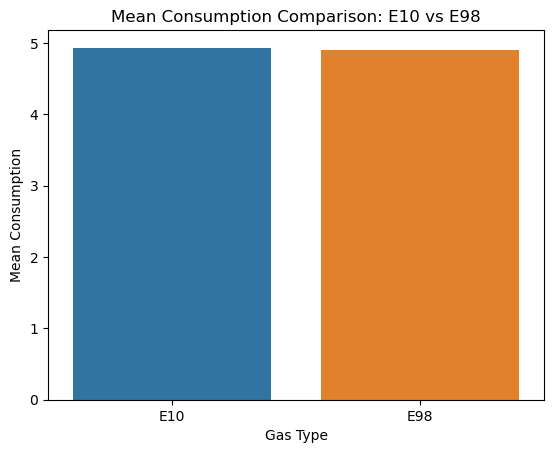

In [22]:
# Create a bar plot to compare mean consumption for E10 and E98
sns.barplot(x=['E10', 'E98'], y=[mean_e10, mean_e98])
plt.title('Mean Consumption Comparison: E10 vs E98')
plt.xlabel('Gas Type')
plt.ylabel('Mean Consumption')
plt.show()

### Building a prediction model 

To make a model to predict the consumption based on fuel type, you can use a machine learning algorithm.

In [23]:
## getting the numerical and cat data into 2 dataframes

numericals = df.select_dtypes(include=['int', 'float'])
categorical = df.select_dtypes(include=['object'])

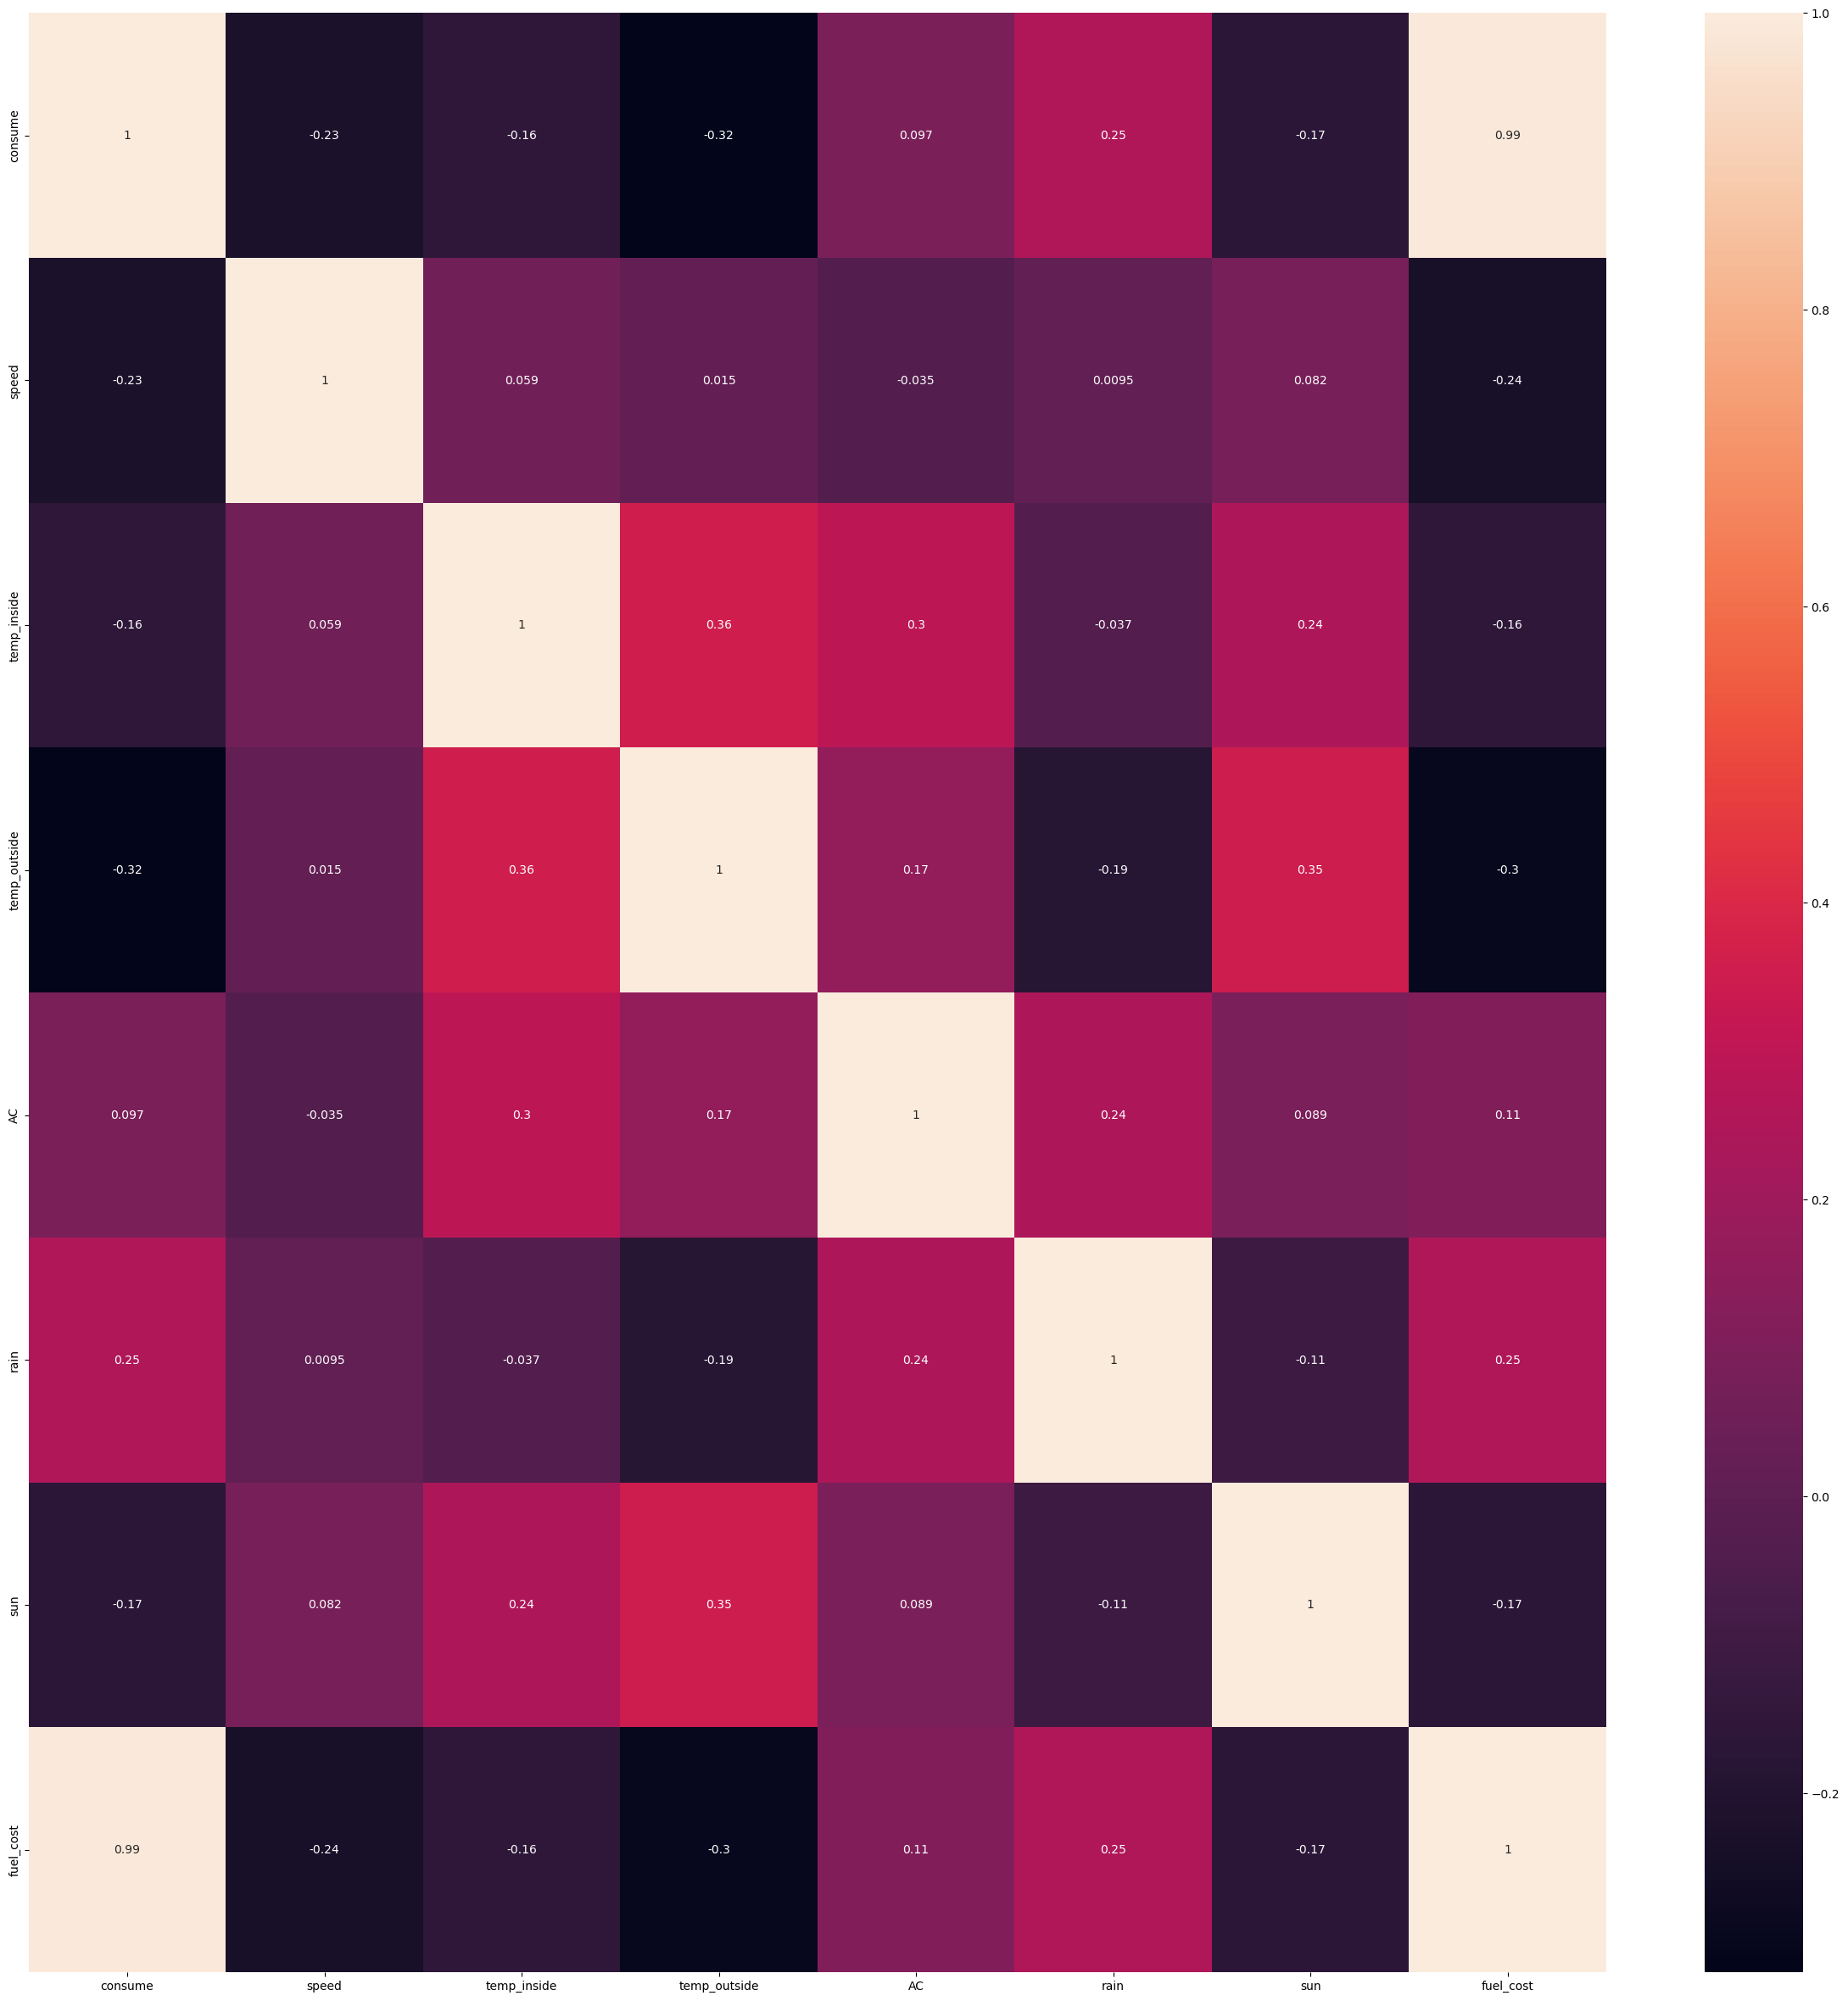

In [24]:
###check the multicollinearity between the features
correlations_matrix = numericals.corr()
#correlations_matrix
fig, ax=plt.subplots(figsize=(30,30))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [25]:
X = df.drop(['consume'], axis=1)
y = df['consume']

In [26]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Scaling our test and train numericals

In [27]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = pd.DataFrame(transformer.transform(numericals_train),columns=numericals_train.columns) 
numericals_test_standardized = pd.DataFrame(transformer.transform(numericals_test),columns=numericals_test.columns)

###### Encoding our categoricals

In [28]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', drop='first').fit(categoricals_train)
column_name = encoder.get_feature_names_out(categoricals_train.columns)
categoricals_train_encoded = pd.DataFrame(encoder.transform(categoricals_train).toarray(), columns=column_name)
categoricals_test_encoded = pd.DataFrame(encoder.transform(categoricals_test).toarray(),columns=column_name)

/Users/meysouromezzine/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


###### Concat both num and cat¶

In [29]:
numericals_train_standardized.reset_index(drop=True, inplace=True)
categoricals_train_encoded.reset_index(drop=True, inplace=True)
X_train_encoded = pd.concat((numericals_train_standardized, categoricals_train_encoded), axis=1)

numericals_test_standardized.reset_index(drop=True, inplace=True)
categoricals_test_encoded.reset_index(drop=True, inplace=True)
X_test_encoded = pd.concat((numericals_test_standardized, categoricals_test_encoded), axis=1)



In [30]:
X_test_encoded.shape

(78, 159)

In [31]:
X_train_encoded.shape

(310, 159)

###### Training the model

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [37]:
# Predict the consumption for the test data
y_pred = model.predict(X_test_encoded)

In [38]:
# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

Mean squared error:  0.010749147939770715


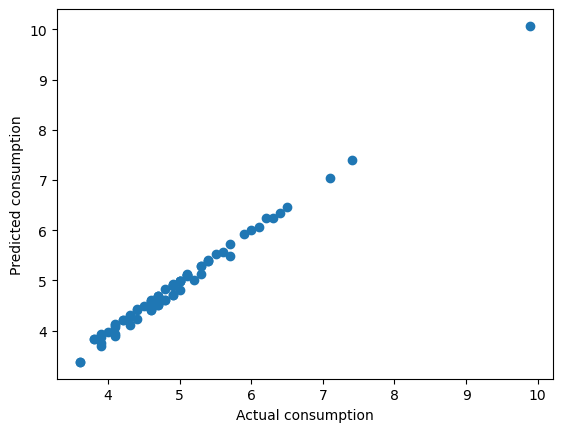

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual consumption')
plt.ylabel('Predicted consumption')
plt.show()